In [1]:
cd ../gh/usesthis/

/Users/lp1/gh/usesthis


In [2]:
import glob

In [3]:
files = glob.glob('/Users/lp1/gh/usesthis/posts/*')

In [7]:
len(files)

751

In [8]:
content = open(files[-1]).read()

In [12]:
import re

In [16]:
re.findall('\[([^\[\(\)]+)\]\[([a-z0-9\.\-]+)?\]',content)

[('Sportsfriends', ''),
 ('Where Is My Heart', 'where-is-my-heart'),
 ('MacBook Pro', 'macbook-pro'),
 ('PS3', ''),
 ('PS4', ''),
 ('PlayStation Move controllers', 'playstation-move'),
 ('Xbox 360 pads', 'xbox-360-controller'),
 ('Edgar Rice Soirée', 'edgar-rice-soiree'),
 ('Winamp', ''),
 ('Word', ''),
 ('Unity', ''),
 ('C#', 'c-sharp'),
 ('Skype', ''),
 ('Slack', ''),
 ('Google Docs', 'google-docs')]

In [17]:
[el[1] or el[0] for el in _]

['Sportsfriends',
 'where-is-my-heart',
 'macbook-pro',
 'PS3',
 'PS4',
 'playstation-move',
 'xbox-360-controller',
 'edgar-rice-soiree',
 'Winamp',
 'Word',
 'Unity',
 'c-sharp',
 'Skype',
 'Slack',
 'google-docs']

In [76]:
def hardware_and_software(filename):
    with open(filename) as f:
        content = f.read()
    return [ware[1].lower() or ware[0].lower() for ware in re.findall('\[([^\[\(\)]+)\]\[([a-z0-9\.\-]+)?\]',content)]

In [77]:
hardware_and_software(files[-2])

['goodtime', 'word', 'hd-audio-recorder-pro-android', 'twin']

In [85]:
hsw_lol =  [hardware_and_software(el) for el in files]

In [95]:
from itertools import chain
w = chain(*hsw_lol)

In [72]:
import pandas as pd

In [96]:
pw = pd.Series(list(w))

In [98]:
pw.value_counts()

macbook-pro                     356
photoshop                       302
macbook-air                     223
chrome                          213
dropbox                         204
imac                            153
illustrator                     140
gmail                           138
google-docs                     136
firefox                         127
mac-os-x                        112
safari                          110
word                            109
git                              97
skype                            97
cinema-display                   96
mac-pro                          96
itunes                           92
keyboard                         91
mail                             90
vim                              86
keynote                          85
textmate                         82
github                           82
sublime-text                     80
iphone-4                         79
windows-7                        76
python                      

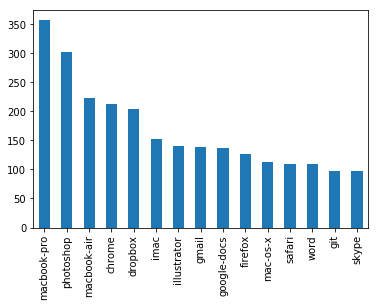

In [99]:
pw.value_counts()[:15].plot(kind='bar')

In [32]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [40]:
hware = glob.glob("./hardware/*")

In [44]:
import yaml

In [45]:
yaml.load(open(hware[-1]))

{'description': 'A system on a chip platform.',
 'name': 'Zynq-7000',
 'url': 'http://www.xilinx.com/products/silicon-devices/soc/zynq-7000.html'}

In [48]:
all_hardware = [yaml.load(open(fname)) for fname in hware]

In [50]:
all_software = [yaml.load(open(fname)) for fname in glob.glob('./software/*')]

In [52]:
gear = all_hardware+all_software

In [54]:
len(gear)

5758

In [55]:
len(all_hardware)

2655

In [56]:
len(all_software)

3103

In [57]:
ware_df = pd.DataFrame(pw)

In [58]:
ware_df.columns = ['title']

In [61]:
gear_df = pd.DataFrame(gear)

In [104]:
def hardwares_frame(ahware):
    data = yaml.load(open(ahware))
    fname = ahware.split('/')[-1][:-4]
    data['title'] = fname
    return data

In [105]:
hardwares_frame(hware[1])

{'description': 'Tripod legs.',
 'name': '055XPROB',
 'title': '055xprob',
 'url': 'https://www.amazon.com/dp/B00IQ7PT50'}

In [106]:
hware_all = [hardwares_frame(x) for x in hware]

In [110]:
sware_all = [hardwares_frame(x) for x in glob.glob('./software/*')]

In [111]:
ware_all = hware_all+sware_all

In [112]:
ware_df = pd.DataFrame(ware_all)

In [117]:
used_ware = pd.DataFrame(pw)

In [119]:
used_ware.columns = ['title']

In [121]:
wares_all_merged = used_ware.merge(ware_df,on='title',how='inner')

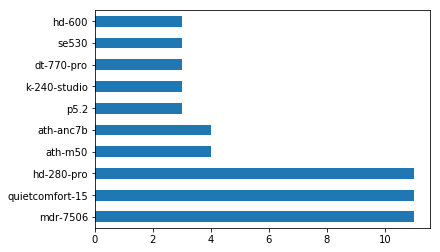

In [122]:
wares_all_merged.ix[wares_all_merged.description.str.contains('headphone')].title.value_counts()[:10].plot(kind='barh')

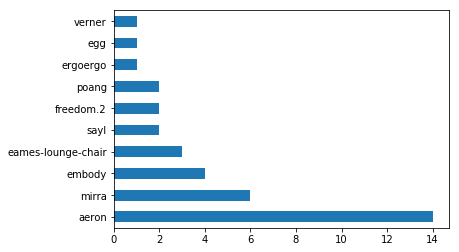

In [123]:
wares_all_merged.ix[wares_all_merged.description.str.contains('chair')].title.value_counts()[:10].plot(kind='barh')

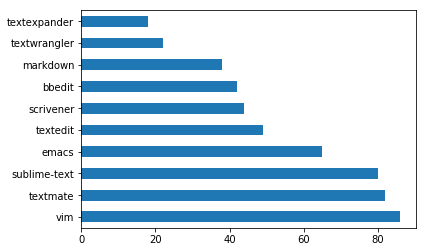

In [124]:
wares_all_merged.ix[wares_all_merged.description.str.contains('text')].title.value_counts()[:10].plot(kind='barh')

In [125]:
def plot_desc_search(text):
    wares_all_merged.ix[wares_all_merged.description.str.contains(text)].title.value_counts()[:10].plot(kind='barh')

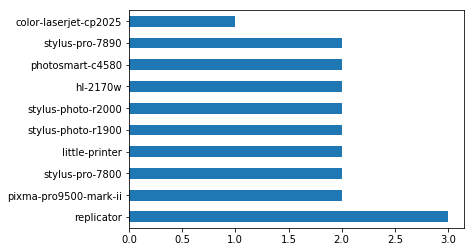

In [126]:
plot_desc_search('printer')

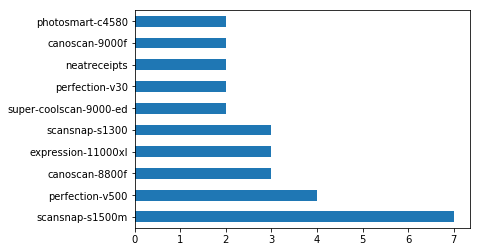

In [127]:
plot_desc_search('scanner')

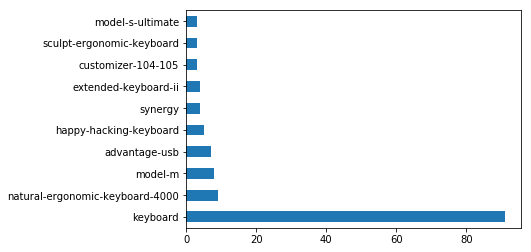

In [128]:
plot_desc_search('keyboard')

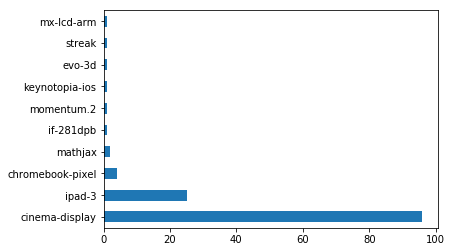

In [129]:
plot_desc_search('display')

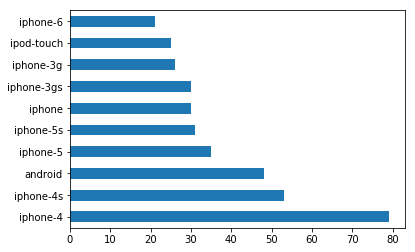

In [130]:
plot_desc_search('phone')

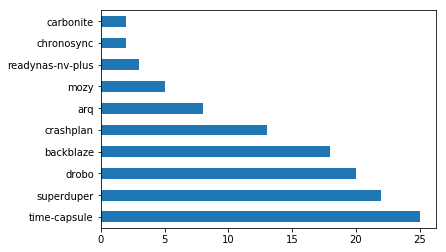

In [131]:
plot_desc_search('backup')

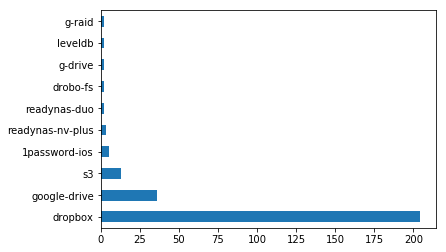

In [132]:
plot_desc_search('storage')

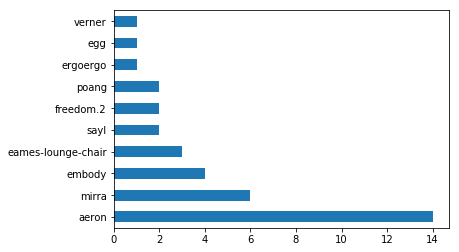

In [133]:
plot_desc_search('chair')

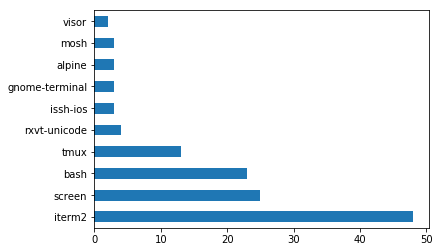

In [134]:
plot_desc_search('terminal')